# **roBERTa question answering model trained on SQUAD2 datasets**

## Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries, packages

In [ ]:
!pip install simpletransformers
!pip3 install --upgrade tensorflow-gpu
!pip install -q wordcloud
!pip install flask_ngrok

from simpletransformers.question_answering import QuestionAnsweringModel
import sys
import os
import json
import transformers
import torch
import warnings
import argparse
import collections
import numpy as np
import re
import string
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from pprint import pprint
from tqdm import tqdm
import pandas as pd
%matplotlib inline
import seaborn as sns
from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import request
import sys
from flask import Flask, render_template, make_response, request, redirect, url_for, jsonify

TRAIN_DATA_PATH = '/content/drive/MyDrive/train-v2.0.json'
DEV_DATA_PATH = '/content/drive/MyDrive/dev-v2.0.json'

     |████████████████████████████████| 225kB 13.2MB/s 
     |████████████████████████████████| 122kB 23.8MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 8.2MB 13.0MB/s 
     |████████████████████████████████| 1.2MB 49.9MB/s 
     |████████████████████████████████| 2.3MB 39.6MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 3.3MB 40.0MB/s 
     |████████████████████████████████| 1.8MB 40.2MB/s 
     |████████████████████████████████| 225kB 47.9MB/s 
     |████████████████████████████████| 174kB 57.2MB/s 
     |████████████████████████████████| 112kB 57.9MB/s 
     |████████████████████████████████| 4.2MB 40.7MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 901kB 40.4MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 133kB 53.4MB/

     |████████████████████████████████| 454.3MB 36kB/s 
     |████████████████████████████████| 4.0MB 21.1MB/s 
     |████████████████████████████████| 471kB 34.0MB/s 
     |████████████████████████████████| 4.0MB 42.1MB/s 
     |████████████████████████████████| 6.0MB 46.4MB/s 
     |████████████████████████████████| 1.2MB 42.7MB/s 
     |████████████████████████████████| 4.9MB 54.8MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.5.0 which is incompatible.
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Found existing installation: ten

## Train moodel


Argument values for training model used from [Simple transformers documentation](https://docs.wandb.ai/guides/integrations/other/simpletransformers)
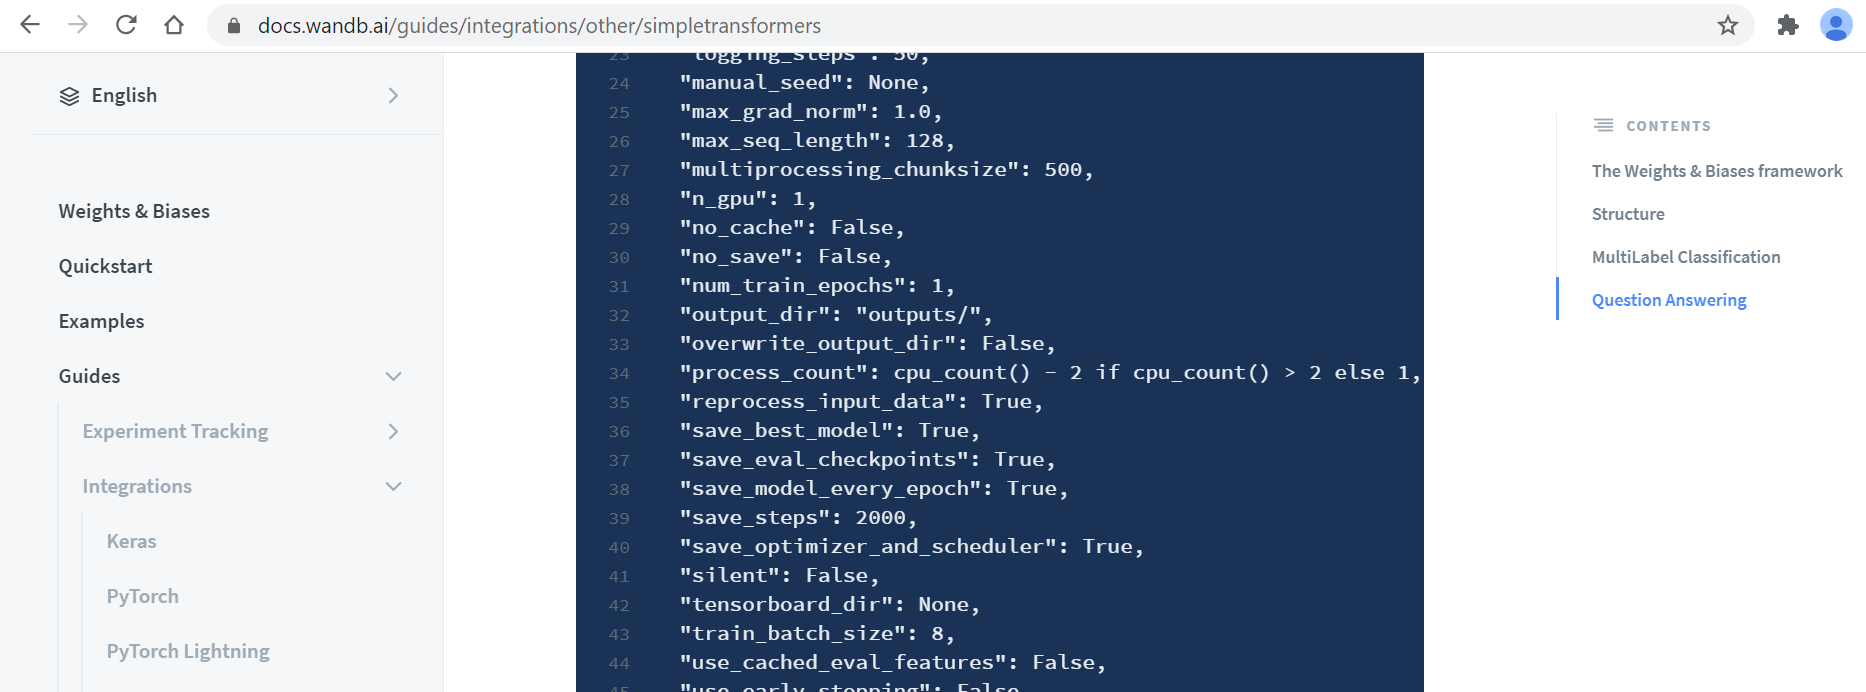

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
torch.cuda.is_available()

with open(TRAIN_DATA_PATH, 'r') as f:
    train_data = json.load(f)
train_data = [item for topic in train_data['data'] for item in topic['paragraphs'] ]

print("==========================================")
print("Training data")
print("==========================================")

print("Train data size = ", len(train_data))
model_type = "roberta"
model_name = "deepset/roberta-base-squad2"


train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,
    "output_dir": f"/content/drive/MyDrive/models/{model_type}",
    "max_seq_length": 128,
    "num_train_epochs": 1,
    "wandb_project": "QuestionAnswering Model Comparison",
    "wandb_kwargs": {"name": model_name},
    "train_batch_size": 8,
    'weight_decay': 0,
    'learning_rate': 4e-5,
    'adam_epsilon': 1e-8,
    'warmup_ratio': 0.06,
    'warmup_steps': 0,
    'max_grad_norm': 1.0,
}

model = QuestionAnsweringModel(model_type=model_type, 
                               model_name=model_name,
                               args=train_args, 
                               use_cuda=True,
                               cuda_device=0)
print("=======================================================")
print("QuestionAnsweringModel for roBERTa training on SQUAD2")
print("=======================================================")


# fine-tuning 
os.makedirs(f"/content/drive/MyDrive/models/{model_type}", exist_ok=True)
model.train_model(train_data=train_data, args=train_args)


print("=======================================================")
print("Pretrained model for roBERTa on SQUAD2 dataset is ready!")
print("=======================================================")


Training data
Train data size =  19035


Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/496M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

QuestionAnsweringModel for roBERTa training on SQUAD2


add example index and unique id: 100%|██████████| 130319/130319 [00:00<00:00, 847305.31it/s]


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Running Epoch 0 of 1:   0%|          | 0/16429 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Pretrained model for roBERTa on SQUAD2 dataset is ready!


## Evaluate model + predictions based on dev dataset 

In [ ]:
# load the dev data into dictionary
with open(DEV_DATA_PATH, 'r') as f:
    dev_data = json.load(f)    
dev_data = [item for topic in dev_data['data'] for item in topic['paragraphs'] ]

print("**Loaded Dev data**")
print("Dev data size = ", len(dev_data))

model_type = "roberta"


if model_type == "roberta":
    model_name = "roberta-base"

train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,
    "output_dir": f"/content/drive/MyDrive/models/{model_type}",
    "max_seq_length": 128,
    "num_train_epochs": 1,
    "wandb_project": "QuestionAnswering Model Comparison",
    "wandb_kwargs": {"name": model_name},
    "train_batch_size": 8,
    'weight_decay': 0,
    'learning_rate': 4e-5,
    'adam_epsilon': 1e-8,
    'warmup_ratio': 0.06,
    'warmup_steps': 0,
    'max_grad_norm': 1.0,
}

model = QuestionAnsweringModel(model_type=model_type, 
                               model_name=f"/content/drive/MyDrive/models/{model_type}/",
                               args=train_args, 
                               use_cuda=True)

preds, _ = model.predict(dev_data)


predictions = {pred['id']: pred['answer'][0] for pred in preds}
print("prediction size = ", len(predictions))

# saving predictions based on dev dataset
os.makedirs(f"/content/drive/MyDrive/output/{model_type}", exist_ok=True)
with open(f"/content/drive/MyDrive/output/{model_type}/predictions.json", 'w') as f:
    json.dump(predictions, f)


**Loaded Dev data**
Dev data size =  1204


add example index and unique id: 100%|██████████| 11873/11873 [00:00<00:00, 848176.24it/s]


Running Prediction:   0%|          | 0/1512 [00:00<?, ?it/s]

prediction size =  11873


### Official evaluation script for SQuAD version 2.0.
Used official script to calculate metrics for pre-trained model.
Link to official eval script: [evaluate-v2.0.py](https://worksheets.codalab.org/worksheets/0xbe2859a20b9e41d2a2b63ea11bd97740).

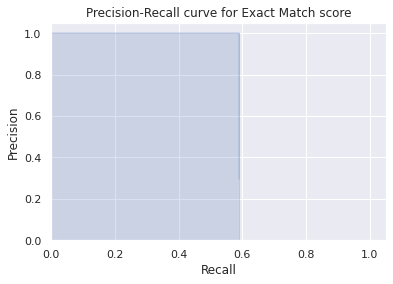

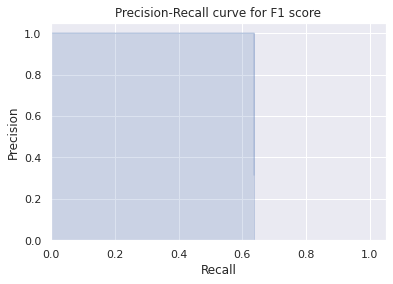

<Figure size 432x288 with 0 Axes>

In [ ]:
def make_qid_to_has_ans(dataset):
  qid_to_has_ans = {}
  for article in dataset:
    for p in article['paragraphs']:
      for qa in p['qas']:
        qid_to_has_ans[qa['id']] = bool(qa['answers'])
  return qid_to_has_ans

def normalize_answer(s):
  """Lower text and remove punctuation, articles and extra whitespace."""
  def remove_articles(text):
    regex = re.compile(r'\b(a|an|the)\b', re.UNICODE)
    return re.sub(regex, ' ', text)
  def white_space_fix(text):
    return ' '.join(text.split())
  def remove_punc(text):
    exclude = set(string.punctuation)
    return ''.join(ch for ch in text if ch not in exclude)
  def lower(text):
    return text.lower()
  return white_space_fix(remove_articles(remove_punc(lower(s))))

def get_tokens(s):
  if not s: return []
  return normalize_answer(s).split()

def compute_exact(a_gold, a_pred):
  return int(normalize_answer(a_gold) == normalize_answer(a_pred))

def compute_f1(a_gold, a_pred):
  gold_toks = get_tokens(a_gold)
  pred_toks = get_tokens(a_pred)
  common = collections.Counter(gold_toks) & collections.Counter(pred_toks)
  num_same = sum(common.values())
  if len(gold_toks) == 0 or len(pred_toks) == 0:
    # If either is no-answer, then F1 is 1 if they agree, 0 otherwise
    return int(gold_toks == pred_toks)
  if num_same == 0:
    return 0
  precision = 1.0 * num_same / len(pred_toks)
  recall = 1.0 * num_same / len(gold_toks)
  f1 = (2 * precision * recall) / (precision + recall)
  return f1

def get_raw_scores(dataset, preds):
  exact_scores = {}
  f1_scores = {}
  for article in dataset:
    for p in article['paragraphs']:
      for qa in p['qas']:
        qid = qa['id']
        gold_answers = [a['text'] for a in qa['answers']
                        if normalize_answer(a['text'])]
        if not gold_answers:
          # For unanswerable questions, only correct answer is empty string
          gold_answers = ['']
        if qid not in preds:
          print('Missing prediction for %s' % qid)
          continue
        a_pred = preds[qid]
        # Take max over all gold answers
        exact_scores[qid] = max(compute_exact(a, a_pred) for a in gold_answers)
        f1_scores[qid] = max(compute_f1(a, a_pred) for a in gold_answers)
  return exact_scores, f1_scores

def apply_no_ans_threshold(scores, na_probs, qid_to_has_ans, na_prob_thresh):
  new_scores = {}
  for qid, s in scores.items():
    pred_na = na_probs[qid] > na_prob_thresh
    if pred_na:
      new_scores[qid] = float(not qid_to_has_ans[qid])
    else:
      new_scores[qid] = s
  return new_scores

def make_eval_dict(exact_scores, f1_scores, qid_list=None):
  if not qid_list:
    total = len(exact_scores)
    return collections.OrderedDict([
        ('exact', 100.0 * sum(exact_scores.values()) / total),
        ('f1', 100.0 * sum(f1_scores.values()) / total),
        ('total', total),
    ])
  else:
    total = len(qid_list)
    return collections.OrderedDict([
        ('exact', 100.0 * sum(exact_scores[k] for k in qid_list) / total),
        ('f1', 100.0 * sum(f1_scores[k] for k in qid_list) / total),
        ('total', total),
    ])

def merge_eval(main_eval, new_eval, prefix):
  for k in new_eval:
    main_eval['%s_%s' % (prefix, k)] = new_eval[k]

def plot_pr_curve(precisions, recalls, out_image, title):
  plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
  plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.title(title)
  plt.savefig(out_image)
  plt.show()
  plt.clf()

def make_precision_recall_eval(scores, na_probs, num_true_pos, qid_to_has_ans, out_image=None, title=None):
  qid_list = sorted(na_probs, key=lambda k: na_probs[k])
  true_pos = 0.0
  cur_p = 1.0
  cur_r = 0.0
  precisions = [1.0]
  recalls = [0.0]
  avg_prec = 0.0
  for i, qid in enumerate(qid_list):
    if qid_to_has_ans[qid]:
      true_pos += scores[qid]
    cur_p = true_pos / float(i+1)
    cur_r = true_pos / float(num_true_pos)
    if i == len(qid_list) - 1 or na_probs[qid] != na_probs[qid_list[i+1]]:
      # i.e., if we can put a threshold after this point
      avg_prec += cur_p * (cur_r - recalls[-1])
      precisions.append(cur_p)
      recalls.append(cur_r)
  if out_image:
    plot_pr_curve(precisions, recalls, out_image, title)
  return {'ap': 100.0 * avg_prec}

def run_precision_recall_analysis(main_eval, exact_raw, f1_raw, na_probs, qid_to_has_ans, out_image_dir):
  if out_image_dir and not os.path.exists(out_image_dir):
    os.makedirs(out_image_dir)
  num_true_pos = sum(1 for v in qid_to_has_ans.values() if v)
  if num_true_pos == 0:
    return
  pr_exact = make_precision_recall_eval(
      exact_raw, na_probs, num_true_pos, qid_to_has_ans,
      out_image=os.path.join(out_image_dir, 'pr_exact.png'),
      title='Precision-Recall curve for Exact Match score')
  pr_f1 = make_precision_recall_eval(
      f1_raw, na_probs, num_true_pos, qid_to_has_ans,
      out_image=os.path.join(out_image_dir, 'pr_f1.png'),
      title='Precision-Recall curve for F1 score')
  merge_eval(main_eval, pr_exact, 'pr_exact')
  merge_eval(main_eval, pr_f1, 'pr_f1')


def find_best_thresh(preds, scores, na_probs, qid_to_has_ans):
  num_no_ans = sum(1 for k in qid_to_has_ans if not qid_to_has_ans[k])
  cur_score = num_no_ans
  best_score = cur_score
  best_thresh = 0.0
  qid_list = sorted(na_probs, key=lambda k: na_probs[k])
  for i, qid in enumerate(qid_list):
    if qid not in scores: continue
    if qid_to_has_ans[qid]:
      diff = scores[qid]
    else:
      if preds[qid]:
        diff = -1
      else:
        diff = 0
    cur_score += diff
    if cur_score > best_score:
      best_score = cur_score
      best_thresh = na_probs[qid]
  return 100.0 * best_score / len(scores), best_thresh

def find_all_best_thresh(main_eval, preds, exact_raw, f1_raw, na_probs, qid_to_has_ans):
  best_exact, exact_thresh = find_best_thresh(preds, exact_raw, na_probs, qid_to_has_ans)
  best_f1, f1_thresh = find_best_thresh(preds, f1_raw, na_probs, qid_to_has_ans)
  main_eval['best_exact'] = best_exact
  main_eval['best_exact_thresh'] = exact_thresh
  main_eval['best_f1'] = best_f1
  main_eval['best_f1_thresh'] = f1_thresh

def main():
  with open(DEV_DATA_PATH) as f:
    dataset_json = json.load(f)
    dataset = dataset_json['data']
  with open('/content/drive/MyDrive/output/roberta/predictions.json') as f:
    preds = json.load(f)
  ok = False
  if ok:
    print("")
  else:
    na_probs = {k: 0.0 for k in preds}
  qid_to_has_ans = make_qid_to_has_ans(dataset)  # maps qid to True/False
  has_ans_qids = [k for k, v in qid_to_has_ans.items() if v]
  no_ans_qids = [k for k, v in qid_to_has_ans.items() if not v]
  exact_raw, f1_raw = get_raw_scores(dataset, preds)
  exact_thresh = apply_no_ans_threshold(exact_raw, na_probs, qid_to_has_ans,1.0)
  f1_thresh = apply_no_ans_threshold(f1_raw, na_probs, qid_to_has_ans,1.0)
  out_eval = make_eval_dict(exact_thresh, f1_thresh)
  if has_ans_qids:
    has_ans_eval = make_eval_dict(exact_thresh, f1_thresh, qid_list=has_ans_qids)
    merge_eval(out_eval, has_ans_eval, 'HasAns')
  if no_ans_qids:
    no_ans_eval = make_eval_dict(exact_thresh, f1_thresh, qid_list=no_ans_qids)
    merge_eval(out_eval, no_ans_eval, 'NoAns')
  if na_prob_file:
    find_all_best_thresh(out_eval, preds, exact_raw, f1_raw, na_probs, qid_to_has_ans)
  if na_prob_file and out_image_dir:
    run_precision_recall_analysis(out_eval, exact_raw, f1_raw, na_probs, 
                                  qid_to_has_ans, out_image_dir)
  if out_file:
    with open(out_file, 'w') as f:
      json.dump(out_eval, f)
  else:
    print(json.dumps(out_eval, indent=2))

if __name__ == '__main__':
  na_prob_file = '/content/drive/MyDrive/models/na_prob.json'
  out_image_dir = '/content/drive/MyDrive/models/'
  out_file = '/content/drive/MyDrive/models/out/out.json'
  main()

In [ ]:
with open('/content/drive/MyDrive/models/out/out.json', 'r') as file:
  reader = file.read()
print(reader.replace(","," \n").replace("{",'').replace('}','').replace('"',''))

exact: 72.93860018529436 
 f1: 75.28422685648894 
 total: 11873 
 HasAns_exact: 58.906882591093115 
 HasAns_f1: 63.604862595663384 
 HasAns_total: 5928 
 NoAns_exact: 86.93019343986543 
 NoAns_f1: 86.93019343986543 
 NoAns_total: 5945 
 best_exact: 72.93860018529436 
 best_exact_thresh: 0.0 
 best_f1: 75.28422685648891 
 best_f1_thresh: 0.0 
 pr_exact_ap: 17.325261855310128 
 pr_f1_ap: 20.198930025756557


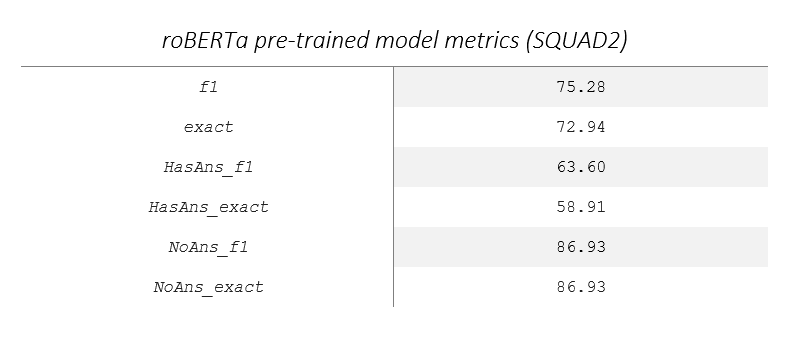

## Predict answer

In [ ]:
model_type = 'roberta'
model = QuestionAnsweringModel(model_type=model_type, model_name=f"/content/drive/MyDrive/models/{model_type}/", use_cuda=False)
cntx1 ="The Norman dynasty had a major political, cultural and military impact on medieval Europe and even the Near East. The Normans were famed for their martial spirit and eventually for their Christian piety, becoming exponents of the Catholic orthodoxy into which they assimilated. They adopted the Gallo-Romance language of the Frankish land they settled, their dialect becoming known as Norman, Normaund or Norman French, an important literary language. The Duchy of Normandy, which they formed by treaty with the French crown, was a great fief of medieval France, and under Richard I of Normandy was forged into a cohesive and formidable principality in feudal tenure. The Normans are noted both for their culture, such as their unique Romanesque architecture and musical traditions, and for their significant military accomplishments and innovations. Norman adventurers founded the Kingdom of Sicily under Roger II after conquering southern Italy on the Saracens and Byzantines, and an expedition on behalf of their duke, William the Conqueror, led to the Norman conquest of England at the Battle of Hastings in 1066. Norman cultural and military influence spread from these new European centres to the Crusader states of the Near East, where their prince Bohemond I founded the Principality of Antioch in the Levant, to Scotland and Wales in Great Britain, to Ireland, and to the coasts of north Africa and the Canary Islands."
cntx2 ="The pound-force has a metric counterpart, less commonly used than the newton: the kilogram-force (kgf) (sometimes kilopond), is the force exerted by standard gravity on one kilogram of mass. The kilogram-force leads to an alternate, but rarely used unit of mass: the metric slug (sometimes mug or hyl) is that mass that accelerates at 1 m\u00b7s\u22122 when subjected to a force of 1 kgf. The kilogram-force is not a part of the modern SI system, and is generally deprecated; however it still sees use for some purposes as expressing aircraft weight, jet thrust, bicycle spoke tension, torque wrench settings and engine output torque. Other arcane units of force include the sth\u00e8ne, which is equivalent to 1000 N, and the kip, which is equivalent to 1000 lbf."
question1_1 = "Who ruled the duchy of Normandy"
question1_2 ="What religion were the Normans"
question1_3 = "In what country is Normandy located?"
question2_1 = "What is a very seldom used unit of mass in the metric system?"

def predict_answer(context, question):

		to_predict = [{'context': context, 'qas': [{'question':question,'id':'0'}]}]

		preds, _ = model.predict(to_predict)

		print(preds[0]['answer'][0])
		if(preds[0]['answer'][0] == ""):
			result = "No answer found"
		else:
			result = preds[0]['answer'][0]
    
		return ({'output':result})

predict_answer(cntx1, question1_2)
predict_answer(cntx1, question1_3)

add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8050.49it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

Christian


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8507.72it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

France,


{'output': 'France,'}

## **Dataset analysis**

### Dataset Analysis : categories of answers, reasoning required, syntactic divergence
Table below is a "Examples from the development set for each category of reasoning required to answer a question. Image credits to Rajpurkar et al., the original creators of the dataset." 
Link to the [research paper](https://towardsdatascience.com/the-quick-guide-to-squad-cae08047ebee).

Tried answer predictions for given examples with my pre-trained model with SQUAD2 train dataset:  Lexical variantion(world knowledge),  

*   Lexical variantion(synonymy),
*   Lexical variantion(world knowledge)
*   Syntactic variation
*   Ambiguous



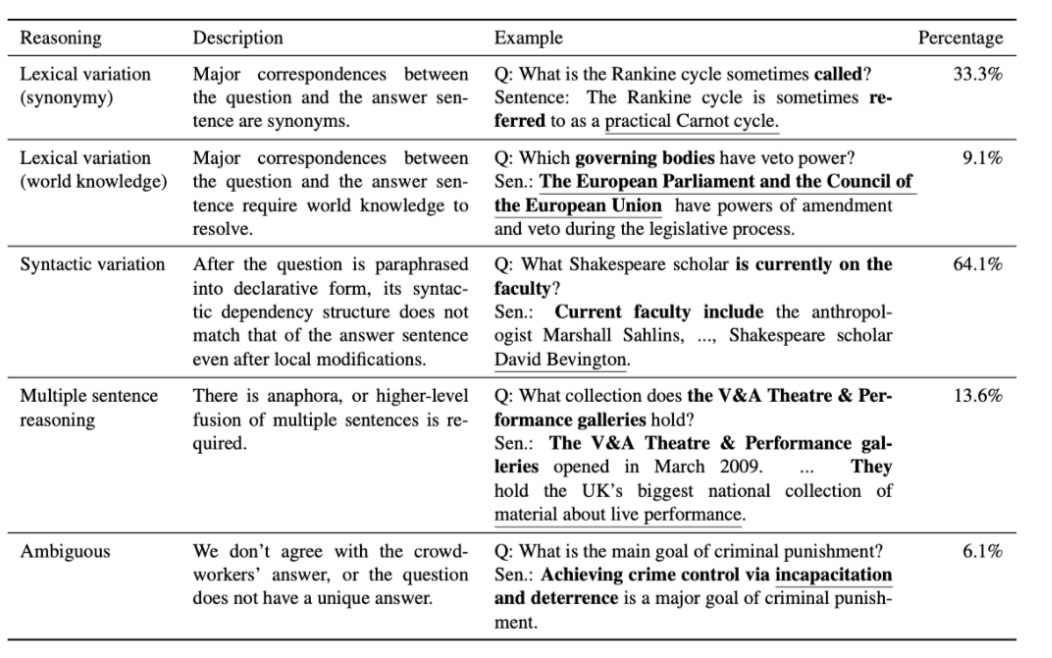

In [ ]:
lv_synon_context = 'The Rankine cycle is sometimes referred to as a practical Carnot cycle.'
lv_synon_question = 'What is the Rankine cycle sometimes called?'
lv_knowledge_context = 'The European Parliament and the Council of the European Union have powers of amendment and veto during the legislative process.'
lv_knowledge_question = 'which governing bodies have veto power?'
syntactic_variation_context ="Current faculty include the anthropologist Marshall Sahlins, ..., Shakespeare scholar David Benvington."
syntactic_variation_question ="what Shakespeare scholar is currently on the faculty?"
ambiguous_context = "Achieving crime control via incapacition and deterrence is a major goal of criminal punishment."
ambiguous_question = "What is the main goal of criminal punishment?"

print('========================================================================')
print('Lexical variantion(synonymy)')
print('========================================================================')
predict_answer(lv_synon_context, lv_synon_question)
print('========================================================================')
print('Lexical variantion(world knowledge)')
print('========================================================================')
predict_answer(lv_knowledge_context, lv_knowledge_question)
print('========================================================================')
print('Syntactic variation')
print('========================================================================')
predict_answer(syntactic_variation_context, syntactic_variation_question)
print('========================================================================')
print('Ambiguous')
print('========================================================================')
predict_answer(ambiguous_context, ambiguous_question)


Lexical variantion(synonymy)


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 6875.91it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

practical Carnot cycle.
Lexical variantion(world knowledge)


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 7869.24it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

The European Parliament and the Council of the European Union
Syntactic variation


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8490.49it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

David Benvington.
Ambiguous


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8272.79it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

Achieving crime control


{'output': 'Achieving crime control'}

### Statistic analysis for context in dataset

In [ ]:
dataset_type = 'train'

print ('========================================================')
print ('Loading the statistic for context in {} dataset'.format(dataset_type))
print ('========================================================')

def tokenize(sequence):
    tokens = [token.replace("``", '"').replace("''", '"').lower() for token in nltk.word_tokenize(sequence)]
    return tokens

def preprocess_and_write(dataset, dataset_type, out_dir):
    
    num_contexts = []

    for articles_id in tqdm(range(len(dataset['data'])), desc="Preprocessing {}".format(dataset_type)):
        article_paragraphs = dataset['data'][articles_id]['paragraphs']
        for pid in range(len(article_paragraphs)):
            context = article_paragraphs[pid]['context']
            context = context.replace("''", '" ')
            context = context.replace("``", '" ')
            context_tokens = tokenize(context)
            num_contexts.append((' '.join(context_tokens)))

    cntx_num = list(range(len(num_contexts)))

    with open(os.path.join(out_dir, dataset_type +'.context'), 'w') as context_file:
        for i in cntx_num:
            context = num_contexts[i]
            context_file.write(context+'\n')
            # write tokenized data to file

with open('/content/drive/MyDrive/train-v2.0.json') as file:
        train_dataset = json.load(file)

preprocess_and_write(train_dataset, dataset_type, '/content/drive/MyDrive/models/out')



Loading the statistic for context in train dataset


Preprocessing train: 100%|██████████| 442/442 [00:14<00:00, 29.98it/s]


In [ ]:
train_context = '/content/drive/MyDrive/models/out/train.context'

context_len = []

with open(train_context) as fp:  
    lines = fp.readlines()
    print("Lines in total: ",len(lines))
    for line in lines:
        words = len(line.split())
        context_len.append(words)

print("The length of 5 contexts in dataset: " , context_len[:5])

Lines in total:  19035
The length of 5 contexts in dataset:  [139, 209, 199, 120, 144]


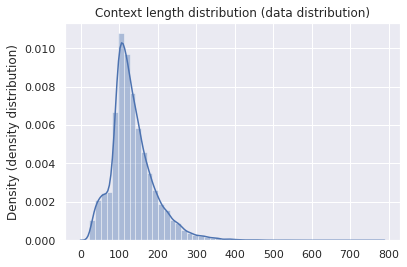

In [ ]:
sns.set(color_codes=True)
ax = sns.distplot(context_len)
ax.set_title('Context length distribution (data distribution)')
ax.set_ylabel('Density (density distribution)')
plt.savefig('/content/drive/MyDrive/models/out/context_distribution.png')
plt.show()

In [ ]:
context_array = np.array(context_len)

print("Min:   ", np.min(context_array))
print("Max:   ", np.max(context_array))
print("Mean:   ", np.mean(context_array))
print("25th percentile:   ", np.percentile(context_array, 25))
print("50th percentile:   ", np.percentile(context_array, 50))
print("75th percentile:   ", np.percentile(context_array, 75))
print("95th percentile:   ", np.percentile(context_array, 95))
print("99th percentile:   ", np.percentile(context_array, 99))

Min:    22
Max:    766
Mean:    134.15408458103494
25th percentile:    99.0
50th percentile:    124.0
75th percentile:    160.0
95th percentile:    241.0
99th percentile:    321.0


## **API service using Flask and Postman**

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"


@app.route('/roBERTa', methods = ['POST'])
def get_data():
	if request.method == 'POST':
		if(request.get_json() is None):
			data = request.form
		else:
			data = request.get_json()
		context = data['context']
		question = data['question']
		return jsonify(predict_answer(context,question))
app.run()